# Movie Analysis
**Author**: Eric Wehmueller
***

## Overview

TODO: A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. Our job is to explore what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline

### Data Investigation

To start, we will iterate over all the data files in the "data" directory within this notebook and display the first few results.  This is to get a feel for what our starting point is and what raw data we have to work with.

In [24]:
directory = 'data/' #all data files stored in 'data/' directory of this notebook
for filename in os.listdir(directory): #iterating over the filenames, read_csv for each file
    print(filename)
    exact_filename = directory + filename
    
    #adding specific cases for files that need more read_csv parameters 
    if filename == 'rt.movie_info.tsv.gz':
        temp_df = pd.read_csv(exact_filename, sep='\t', header=0)
    elif filename == 'rt.reviews.tsv.gz':
         temp_df = pd.read_csv(exact_filename, sep='\t', header=0, encoding='latin-1')
    else:
        temp_df = pd.read_csv(exact_filename)

    #display(temp_df.info())
    display(temp_df.head())
    print('\n')

bom.movie_gross.csv.gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010




imdb.name.basics.csv.gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"




imdb.title.akas.csv.gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0




imdb.title.basics.csv.gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"




imdb.title.crew.csv.gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943




imdb.title.principals.csv.gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"




imdb.title.ratings.csv.gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21




rt.movie_info.tsv.gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN




rt.reviews.tsv.gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"




tmdb.movies.csv.gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186




tn.movie_budgets.csv.gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#load data for single item
# my_filename = 'data/rt.movie_info.tsv.gz'
# print(my_filename)
# df_single = pd.read_csv(my_filename)
# df_single.head()

In [4]:
#df.info()
#df.describe()
#df['region'].value_counts()
#df['region'].value_counts(normalize=True)


## Questions
Now that we've gotten a quick view of the data we have to work with, let's create and define some questions that can be answered for the purpose of providing actions that Microsoft should take. There are 2 paths I believe we can go down, depending on Microsofts goals: quality vs profit. If the priority is to make a film beloved by audiences, what genre is most likely to receive the highest ratings? If the primary focus is profit, what type of movie (genre) is most likely to be the most profitable?   It will be our personal goal to provide answers for both through our data investigation.
***
* 1. Which genre(s) is most likely to receive the highest ratings?
* 2. Which genre(s) is most likely to be the most profitable?
* 3. What is the optimal amount screen time for each (or top genres)?
***

## Initial Notes on Tables
Here are some notes on the initial findings of the tables from above- the tables relevant to answer these questions are underlined and marked in bold.
***

<ins>**bom.movie_gross.csv.gz**</ins>- Good gross/money Information

imdb.name.basics.csv.gz- Mostly just cast/workers information

imdb.title.akas.csv.gz- title ids/info

<ins>**imdb.title.basics.csv.gz**</ins>- movie basics with year and runtime. very important start point for us.

imdb.title.crew.csv.gz- directors and writers information

imdb.title.principals.csv.gz- actors information

<ins>**imdb.title.ratings.csv.gz**</ins>- average rating and number of votes for each movie ID

<ins>**rt.movie_info.tsv.gz**</ins>- contains genre, runtime, but I'm not sure where the title comes in

<ins>**rt.reviews.tsv.gz**</ins>- reviews based on movie 'id'

<ins>**tmdb.movies.csv.gz**</ins>- genre with title with ratings, basically a standalone set that gives me everything I need right off the bat

<ins>**tn.movie_budgets.csv.gz**</ins>- movie titles with production budget and domestic/worldwide gross income, might be better for determining margains  
***

The RT (Rotten Tomatoes), IMDB, and TMDB tables will be good for determining ratings and audience opinion to help answer our first question.  

The BOM and TN tables will be good starting points for determining profits, to help answer our second question.  However, the inclusion of a production budget in the TN table leads me to believe this will provide more relevant information on the profits of a movie.
An example of this might be; a movie might have made a lot of money at the box office, but the production cost may have been extremely high and the movie might have lost money overall. One would not be able to tell if such a profit loss occured, if only looking at the BOM dataset. For this reason, the TN dataset may provide us more value in this situation.  

In [5]:
##REMOVE
directory = 'data/' #all data files stored in 'data/' directory of this notebook
for filename in os.listdir(directory): #iterating over the filenames, read_csv for each file
    print(filename)

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


## Highest Ratings Genre

**Which genre(s) is most likely to receive the highest ratings?**

To answer this question we will be looking at the "tmdb.movies.csv.gz" table.

In [7]:
#load data for single item
tmdb_filename = 'data/tmdb.movies.csv.gz'
print(tmdb_filename)
df_tmdb = pd.read_csv(tmdb_filename)
df_tmdb.head()

data/tmdb.movies.csv.gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


vote_count
1       6541
2       3044
3       1757
4       1347
5        969
        ... 
1779       1
1785       1
1787       1
1789       1
1075       1
Length: 1693, dtype: int64

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

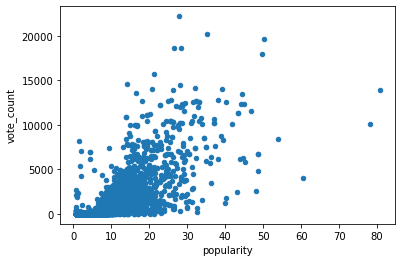

In [8]:
#display(df_tmdb.info())
display(df_tmdb.describe())
#df_tmdb.sort_values('vote_count', ascending=True)
display(df_tmdb.value_counts('vote_count'))
df_tmdb.plot.scatter(x='popularity', y='vote_count')

In [9]:
#cleaning out entries with no defined genre_ids
df_tmdb = df_tmdb[df_tmdb['genre_ids'] != '[]']
print(df_tmdb.shape[0])

#confirming our genre_ids table will no longer start with empty values
display(df_tmdb.sort_values('genre_ids', ascending=False, inplace=False).head()) 

24038


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13467,13467,[99],261810,en,Silenced,0.600,2014-11-19,Silenced,7.7,7
15976,15976,[99],441888,en,America's Greatest Prison Breaks,0.883,2015-12-27,America's Greatest Prison Breaks,6.0,1
15977,15977,[99],566441,en,The Hunger Games: The Phenomenon,0.882,2015-11-12,The Hunger Games: The Phenomenon,10.0,1
15988,15988,[99],562517,en,Birdman: All-Access (A View From the Wings),0.881,2015-05-18,Birdman: All-Access (A View From the Wings),10.0,1
15989,15989,[99],390455,en,IOM TT,0.881,2015-06-27,IOM TT,10.0,1


Moving forward, there are two ways for us to consider the vote data in this table:
* consider every movie rating to be not weigh more than others  (with a minimum # of votes per movie)

or

* consider every single vote from a user to be a rating vote for each of its genres

We'll investigate the first method.  Unfortunately there are a decent amount of movies in this database which have a low number of vote counts. Since we are working for Microsoft, our goal is to create movies that many people will love. However, since we are an extremely large company, there probably needs to be a minimum for the amount of interest in our movie.  As evidenced by this scatterplot, there is a positive correlation between the popularity and the number of votes.  For the time being, we will make a minimum requirement of 5 votes and draw conclusions from that data- we can consider that a minimum for the popularity we expect. We also want to avoid drawing conclusions on movies based around a single review of 10/10, for example.  Although this will filter about half of our results, there are many movies in this dataset that very few people have watched.

In [10]:
#filtering out entries with less than 5 votes
df_tmdb_5vote_min = df_tmdb[df_tmdb['vote_count'] >= 5]
print(df_tmdb_5vote_min.shape[0])
df_tmdb_5vote_min.head()

13653


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
#this is meant to interact with our 'genre_ids' strings from the dataframe
#and return these numbers as a list object
def genre_string_to_list(ids_string):
    strcopy = ids_string.replace('[','').replace(']','').replace(' ','')
    return strcopy.split(',')

In [12]:
#determine what the possible genre_ids are in our dataset
all_genre_ids = [] #empty list start
for index, row in df_tmdb_5vote_min.iterrows(): #iterate over dataframe rows
    genre_string = row['genre_ids']
    genre_list = genre_string_to_list(genre_string) #generate a list for this row
    for genre in genre_list: #iterate over the row, adding to our cumulative list of all ids
        if genre not in all_genre_ids: #if it's not already in our list
            all_genre_ids.append(genre)
        
print(all_genre_ids)

['12', '14', '10751', '16', '28', '878', '35', '53', '27', '80', '18', '10749', '10402', '9648', '36', '37', '10770', '10752', '99']


In [13]:
#Lookup from the movie database API for the genre list
genre_ids_dict = {'12':'Adventure', '28':'Action', '16':'Animation', '35':'Comedy', '80':'Crime', '99':'Documentary',
                     '18':'Drama', '10751':'Family', '14':'Fantasy', '36':'History', '27':'Horror', '10402':'Music',
                     '9648':'Mystery', '10749':'Romance', '878':'SciFi', '10770':'TV Movie', '53':'Thriller',
                     '10752':'War', '37':'Western'}

In [14]:
#Find the vote averge per genre, place into a dictionary
genre_counts_dict = {}
for genre in all_genre_ids:
    temp_df = df_tmdb_5vote_min[df_tmdb_5vote_min['genre_ids'].str.contains(genre)] #dataframe filtered on each genre id
    count = temp_df.shape[0] #number of movies for this genre
    vote_sum = temp_df['vote_average'].sum() #sum of all ratings
    genre_string = genre_ids_dict.get(genre) #lookup genre name based on ID
    genre_counts_dict[genre_string] = vote_sum/count #add average rating for this genre, place into dict
    print(genre_string+ ":" + str(count) + "length   stdev:"+str(temp_df['vote_average'].std()))
print(genre_counts_dict)

Adventure:1033length   stdev:1.2266412674198564
Fantasy:792length   stdev:1.265940683754582
Family:1059length   stdev:1.0459568931907952
Animation:891length   stdev:1.0264314309735072
Action:1943length   stdev:1.2271704636962277
SciFi:1176length   stdev:1.3807395400733886
Comedy:3548length   stdev:1.0861553038379457
Thriller:3071length   stdev:1.1057198041873642
Horror:2173length   stdev:1.1646763097731763
Crime:1086length   stdev:0.9752898881168476
Drama:5439length   stdev:1.02402781719999
Romance:1683length   stdev:0.9903693228905223
Music:464length   stdev:1.0483262184461106
Mystery:884length   stdev:1.0953757152920491
History:401length   stdev:0.9137492302926166
Western:113length   stdev:1.313713168177411
TV Movie:787length   stdev:0.9930527273578579
War:242length   stdev:1.175404060713961
Documentary:1748length   stdev:0.8936576669095091
{'Adventure': 5.935914811229429, 'Fantasy': 5.987247474747474, 'Family': 6.094617563739376, 'Animation': 6.499438832772166, 'Action': 5.627225939

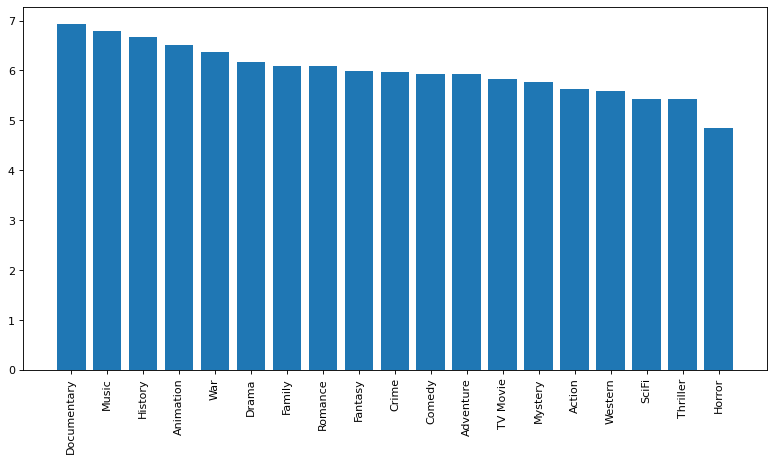

In [15]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

#sorting dict for visualization
genre_counts_dict = dict(sorted(genre_counts_dict.items(), key=lambda item: item[1], reverse=True))
keys = genre_counts_dict.keys()
values = genre_counts_dict.values()

#todo: add titles and more helpful labels
y_pos = np.arange(len(keys))
plt.xticks(y_pos, keys, rotation=90)
plt.bar(keys,values)
plt.show()

As we can see, Documentaries have the best average ratings across all movies with 5 or more ratings in this TMDB dataset.  It is also an extremely good sign that this genre has the lowest standard deviation out of all genres, solidifying its statistic as the best genre in this case (most consistent).  It is also worth mentioning that this data indicates that perhaps it is best to avoid Horror movies, as this genre clearly stands out as the worst-rated genre by a significant margain.

***

Let's use another dataset to see what insights we can find and compare the results. We'll take a look at IMDB.

In [16]:
#TODO: Confirm this on another dataset? if i have time

## Most Profitable Genre

Now we will attempt to answer the question: **Which genre(s) is most likely to be the most profitable?**  

To calculate profits, the "tn.movie_budgets.csv.gz" contains exactly what we need. But we'll need to attempt to import the genre from another table.  Unfortunately there is not a single table that contains both profits AND genre.  We'll begin by investigating the "The Numbers" dataset more closely.

In [17]:
#investigate and clean this data
tn_filename = 'data/tn.movie_budgets.csv.gz'
print(tn_filename)
df_tn = pd.read_csv(tn_filename)
df_tn.sort_values('production_budget', ascending=False).head()

data/tn.movie_budgets.csv.gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,7,"Nov 6, 2015",The Peanuts Movie,"$99,000,000","$130,178,411","$250,091,610"
407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,"$99,000,000","$105,806,508","$190,325,698"
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
5326,27,"Jun 1, 2007",And Then Came Love,"$989,000","$8,158","$8,158"
409,10,"May 4, 2001",The Mummy Returns,"$98,000,000","$202,007,640","$435,040,395"


Immediately I see that we are going to need to convert production_budget, domestic_gross, and worldwide_gross to an actual number format. Sorting by production_budget shows values out of order (see 4th entry "And Then Came Love"), so clearly this needs to be fixed. Let's write a method to convert these strings into number values for us.

In [18]:
def convert_money_to_value(money):
    money = money.replace('$', '')
    money = money.replace(',', '')
    money = int(money) #this could be an issue if we pass the integer value limit but I don't think we will
    return money

convert_money_to_value('$99,000,000') #quick test

99000000

In [19]:
#Only run once***
#apply lambda function on money columns
df_tn['prod_budget_int'] = df_tn.apply(lambda x: convert_money_to_value(x['production_budget']), axis=1)
df_tn['dom_gross_int'] = df_tn.apply(lambda x: convert_money_to_value(x['domestic_gross']), axis=1)
df_tn['ww_gross_int'] = df_tn.apply(lambda x: convert_money_to_value(x['worldwide_gross']), axis=1)
df_tn.drop(columns = ['production_budget', 'domestic_gross', 'worldwide_gross'], inplace=True)
df_tn.head()

,id,release_date,movie,prod_budget_int,dom_gross_int,ww_gross_int
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


For simplicity's sake, let's just look at the most realistic profit value- worldwide, for now.

In [29]:
df_tn['ww_profit'] = df_tn['ww_gross_int'] - df_tn['prod_budget_int']
df_tn.head()

,id,release_date,movie,prod_budget_int,dom_gross_int,ww_gross_int,ww_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


***
Let's explore another path.
At this moment, I am very interested to see if bigger budget movies are more prone to suffer profit losses. This would give us some imporant insight about potential budget risks for a movie. Let's visualize it.

**What percentage of movies in different budget ranges have profit losses?**

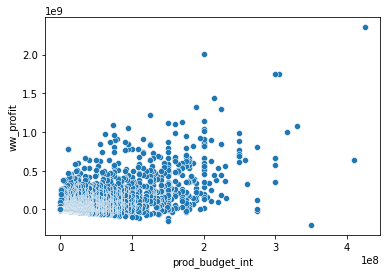

In [32]:
#Budget vs Profit
sns.scatterplot(data=df_tn, x="prod_budget_int", y="ww_profit");

A generally positive correlation here, otherwise there would be no point to creating bigger and better movies. This makes sense.

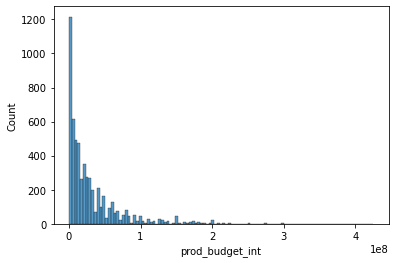

In [34]:
sns.histplot(data=df_tn, x="prod_budget_int");

Based on this histogram, I've determined some resonabily-sized buckets for us to work with.  

**Budget:**    

* <5mil  

* 5-10mil

* 10-20mil

* 20-200mil

* 200mil+

In [129]:
def find_profit_percentage(dataframe, lower_limit=0, upper_limit=1e100):
    temp_df_total = dataframe[(dataframe['prod_budget_int'] <= upper_limit) & (dataframe['prod_budget_int'] >= lower_limit)]
    temp_df_profit = temp_df_total[temp_df_total['ww_profit'] > 0]
    x = temp_df_profit.shape[0]/temp_df_total.shape[0]
    return x*100

bins= ['<5m', '5-10m', '10-20m', '20-50m', '50m-200m', '200m+']
percentages_with_profits = []
percentages_with_profits.append(find_profit_percentage(df_tn, upper_limit=5000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=5000000, upper_limit=10000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=10000000, upper_limit=20000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=20000000, upper_limit=50000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=50000000, upper_limit=200000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=20000000))

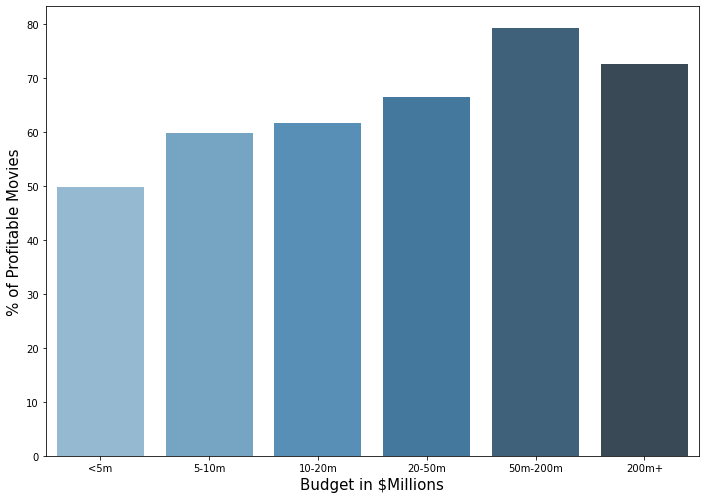

In [130]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.barplot(x= bins, y=percentages_with_profits, palette="Blues_d")
ax.set_xlabel("Budget in $Millions", fontsize=15)
ax.set_ylabel("% of Profitable Movies", fontsize=15);

This is excellent. It appears that this trends upwards, which makes sense.  Movies that are given a higher budget generally have a better chance of being profitable- to a point. We do see some falloff, with the peak being in the 50m-200m range.  This is a large range, so let's take a look at this specific range more closely to see if we can find the best 10m budget range for our movie, based on the data.

In [133]:
def find_profit_percentage_equal_limit_increase(dataframe, starting_lower_limit, increment_value, max_iterations):
    percentages_with_profits = []
    num_iterations = 0
    current_lower_limit = starting_lower_limit
    
    while num_iterations < max_iterations:
        num_iterations+=1 #loop structure for #iterations parameter
        upper_limit = current_lower_limit + increment_value #updating our upper_limit based on the increment_value param
        temp_df_total = dataframe[(dataframe['prod_budget_int'] <= upper_limit) & (dataframe['prod_budget_int'] >= current_lower_limit)]
        temp_df_profit = temp_df_total[temp_df_total['ww_profit'] > 0]
        
        denominator = temp_df_total.shape[0]
        if temp_df_total.shape[0] == 0: #avoiding division by zero
            denominator = 1
        pct = temp_df_profit.shape[0]/denominator
        percentages_with_profits.append(pct*100) #percentage value
        
        current_lower_limit = upper_limit #setting new lower limit for next loop, after calcs have already taken place
    
    return percentages_with_profits

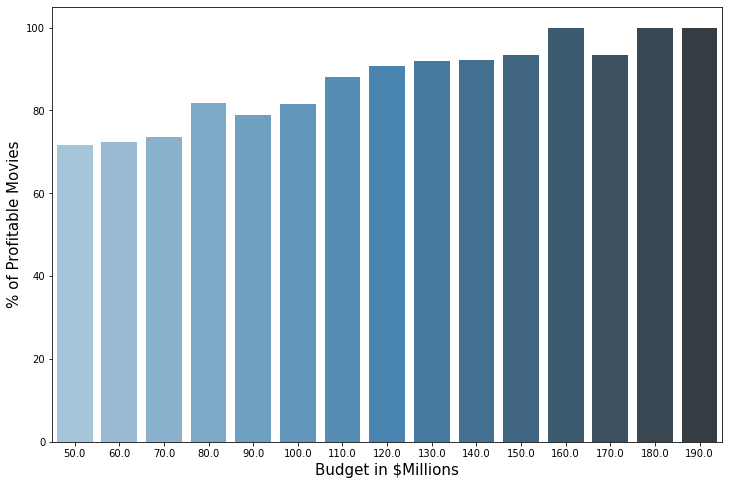

In [134]:
fifty_plus_bins= np.arange(50000000,200000000,10000000)
fifty_plus_bins_percentages = find_profit_percentage_equal_limit_increase(df_tn, 50000000, 10000000, 15)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x= fifty_plus_bins/1000000, y=fifty_plus_bins_percentages, palette="Blues_d")
ax.set_xlabel("Budget in $Millions", fontsize=15)
ax.set_ylabel("% of Profitable Movies", fontsize=15);

The higher up the budget goes, the less likely the movie is to fail, even when just looking at this 50-200m range. It appears that there are upward bumps in this trend at the 80-90m and 160-170m budget ranges.  Although the sample size is getting very small the further up we go, these seem to be "sweet spots" for budget as it relates to profitability.

***

Let's get back to our initial goal, trying to find insights about the profitability per genre.

In [21]:
## join on imdb.title.basics.csv.gz to "import genre"

In [22]:
#used for the vote-for-genre method
#df_tmdb_5vote_min['vote_sum'] = df_tmdb_5vote_min['vote_average'] * df_tmdb_5vote_min['vote_count']
#df_tmdb_5vote_min.head()
#df_tmdb['genre_length'] = df_tmdb['genre_ids'].str.len()

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer in order to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data

Describe the data being used for this project.

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

## Methods

Describe the process for analyzing or modeling the data. For Phase 1, this will be descriptive analysis.

***
Questions to consider:
* How did you prepare, analyze or model the data?
* Why is this approach appropriate given the data and the business problem?
***

## Results

Present your key results. For Phase 1, this will be findings from your descriptive analysis.

***
Questions to consider:
* How do you interpret the results?
* How confident are you that your results would generalize beyond the data you have?
***

Here is an example of how to embed images from your sub-folder:

### Visual 1
![graph1](./images/viz1.png)

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

## For More Information

Please review our full analysis in [our Jupyter Notebook](./dsc-phase1-project-template.ipynb) or our [presentation](./DS_Project_Presentation.pdf).

For any additional questions, please contact **name & email, name & email**

## Repository Structure

Describe the structure of your repository and its contents, for example:

```
├── README.md                           <- The top-level README for reviewers of this project
├── dsc-phase1-project-template.ipynb   <- Narrative documentation of analysis in Jupyter notebook
├── DS_Project_Presentation.pdf         <- PDF version of project presentation
├── data                                <- Both sourced externally and generated from code
└── images                              <- Both sourced externally and generated from code
```